In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') 
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
y_train = to_categorical(y_train,n_classes)
y_test = to_categorical(y_test,n_classes)

In [ ]:
### 原始程式
# model = Sequential()

# # 第一卷積層
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)))

# # 第二卷積層, 並搭配最大池化層與丟棄層
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())

# # 搭配丟棄法的密集隱藏層
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# # 輸出層
# model.add(Dense(n_classes, activation='softmax'))

In [22]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 128)        

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2307 - accuracy: 0.9276 - val_loss: 0.0391 - val_accuracy: 0.9876
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0719 - accuracy: 0.9787 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0528 - accuracy: 0.9850 - val_loss: 0.0210 - val_accuracy: 0.9931
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0414 - accuracy: 0.9882 - val_loss: 0.0184 - val_accuracy: 0.9941
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0192 - val_accuracy: 0.9932
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0305 - accuracy: 0.9913 - val_loss: 0.0159 - val_accuracy: 0.9953
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0205 - val_accuracy: 0.9940

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def show_images_labels_predictions(images,labels,predictions,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[start_id],cmap='binary')
        
        # 有 AI 預測結果資料,才在標題顯示預測結果
        if(len(predictions)>0):
            title = 'ai = ' + str(predictions[start_id])
            
            # 預測正確顯示 (o) 錯誤顯示 (x)
            title += ('(o)' if predictions[start_id]==labels[start_id] else '(x)')

            title += '\nlabel = ' + str(labels[start_id])
        
        # 沒有 AI 預測結果資料,只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])

        ax.set_title(title,fontsize = 12)
        
        # X,Y軸不顯示刻度
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

y_label = np.argmax(y_test, axis=-1)

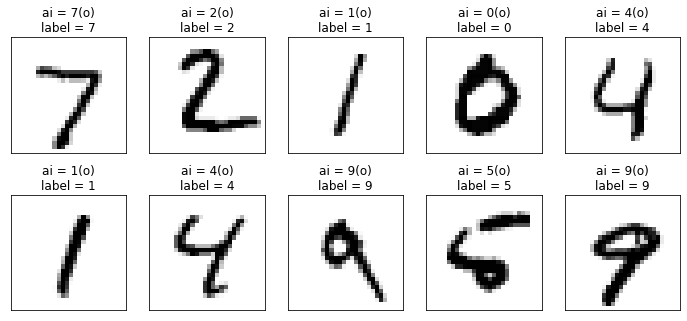

In [25]:
prediction = np.argmax(model.predict(X_test), axis=-1)

show_images_labels_predictions(X_test,y_label,prediction,0)

In [11]:
import glob,cv2
files = glob.glob("image_file1\*.jpg")

test_feature = []
test_label = []

for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY_INV)
    test_feature.append(img)
    label = file[12:13]
    test_label.append(int(label))

test_feature = np.array(test_feature)
test_label = np.array(test_label)

print(type(test_feature))

test_feature_vector = test_feature.reshape(10, 28, 28, 1).astype('float32')
test_feature_normalize = test_feature_vector/255

<class 'numpy.ndarray'>


In [34]:
def show_images(images,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[start_id],cmap='binary')
      
        # X,Y軸不顯示刻度
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

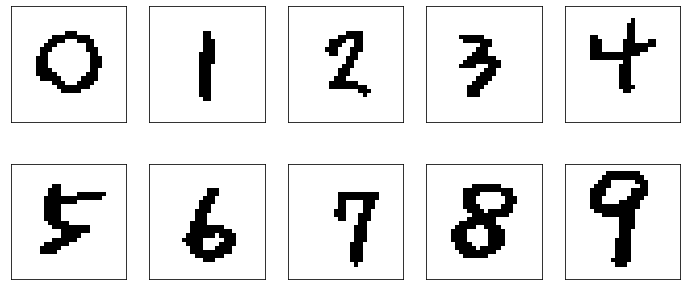

In [36]:
show_images(test_feature_normalize,0)

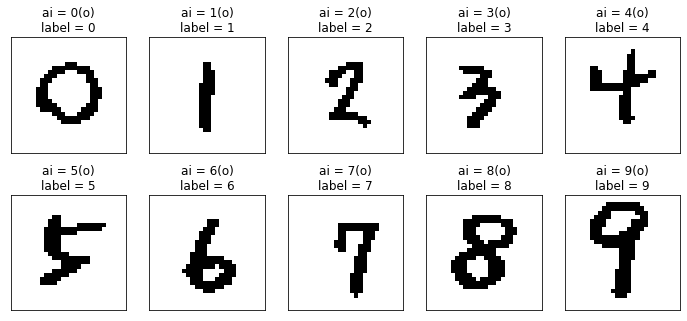

In [26]:
prediction = np.argmax(model.predict(test_feature_normalize), axis=-1)

show_images_labels_predictions(test_feature_normalize,test_label,prediction,0)